<center>

# **Exploring Global Suicide Data**

**An in-depth analysis of suicide rates worldwide**

</center>

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Data Exploration</a>  
     - <a href='#2.1'>2.1 Loading Data</a>
     - <a href='#2.2'>2.2 Handeling Missing Data</a>
     - <a href='#2.3'>2.3 Data Pre-Processing</a>
- <a href='#3'>3. Exploratory Data Analysis (EDA)</a>  
     - <a href='#3.1'> 3.1 Correlation Analysis </a>
     - <a href='#3.2'> 3.2 Trend Overtime </a>
     - <a href='#3.3'> 3.3 Geographical Analysis </a>
- <a href='#4'>4. Demographic Analysis </a> 
     - <a href='#4.1'> 4.1 Total Suicides by Country</a> 
     - <a href='#4.2'> 4.2 Population vs. Suicides</a> 
     - <a href='#4.3'> 4.3 Suicides per 100k Population</a>      
- <a href='#5'>5. Age Groups Analysis </a> 
     - <a href='#5.1'> 5.1 Suicides by Generation</a> 
     - <a href='#5.2'> 5.2 Suicides by Age groups</a> 
     - <a href='#5.3'> 5.2 Suicides by Gender and Age groups</a> 
- <a href='#6'>6. Gender Ratio Analysis </a> 
     - <a href='#6.1'> 6.1 Male-Female Suicide Rates Ratio</a> 
- <a href='#7'>7. Conclusion </a> 



## <a id='1'> 1. Introduction</a>
Close to 800,000 people die due to suicide every year, equating to one person every 40 seconds. This alarming phenomenon spans across the lifespan and stands as the second leading cause of death among 15-29 year olds globally. In 2015, 78% of suicides occurred in low- and middle-income countries, making suicide the 17th leading cause of death worldwide.

Data visualization is a crucial element in the realm of data science, converting complex datasets into clear narratives. It acts as a powerful tool, enhancing our understanding of intricate information and facilitating effective communication of findings. By visually representing data, we can quickly identify patterns, outliers, and trends, enriching our analytical insights.

This Jupyter notebook aims to explore and analyze data related to suicide rates, utilizing information obtained from various sources, including this [Kaggle dataset](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)
This exploration aims to decipher the stories concealed within the data, shedding light on a sensitive and significant societal concern.

## <a id='2'> 2. Data Exploration</a>
### <a id='2.1'>2.1 Loading Data</a>
Let's start by loading the dataset and gaining some initial insights:


In [2]:
import pandas as pd
df = pd.read_csv('kaggle_suicide.csv')
print("Size of the database:", df.shape)
print(df.head())

Size of the database: (27820, 12)
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796    

Next, let's examine statistical information about the data:

In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


And explore the data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### <a id='2.2'>2.2 Handeling Missing Data </a>
Identifying and visualizing missing data:

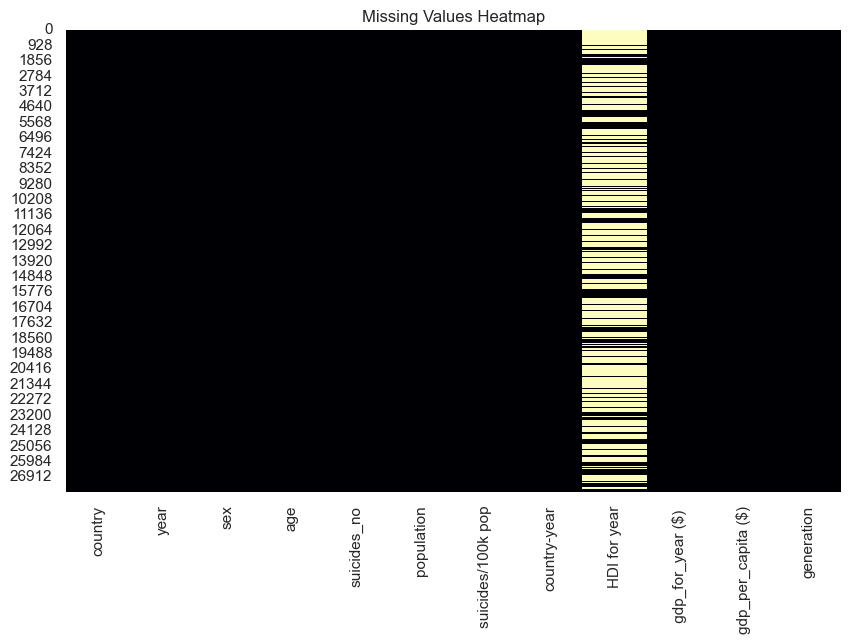

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

It's observed that HDI for the year contains numerous missing values, requiring special attention.

### <a id='2.3'>2.3 Data Pre-Processing </a>

To facilitate analysis, let's standardize and rename the columns:

In [6]:
column_name_mapping = {
    'country': 'country',
    'year': 'year',
    'sex': 'gender',
    'age': 'age',
    'suicides_no': 'suicides',
    'population': 'population',
    'suicides/100k pop': 'suicides_per_100k',
    'country-year': 'country_year',
    'hdi for year': 'hdi',
    ' gdp_for_year ($) ': 'gdp_year',  
    'gdp_per_capita ($)': 'gdp_per_capita',
    'generation': 'generation'
}

df.rename(columns=column_name_mapping, inplace=True)

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

print(df.columns)

Index(['country', 'year', 'gender', 'age', 'suicides', 'population',
       'suicides_per_100k', 'country_year', 'hdi for year', 'gdp_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


## <a id='3'> 3. Exploratory Data Analysis (EDA) </a>

### <a id='3.1'>3.1 Correlation Analysis </a>

Understanding relationships within the dataset:

/var/folders/th/jmr235c937d491kvdp6j1k180000gq/T/ipykernel_15012/3182830956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


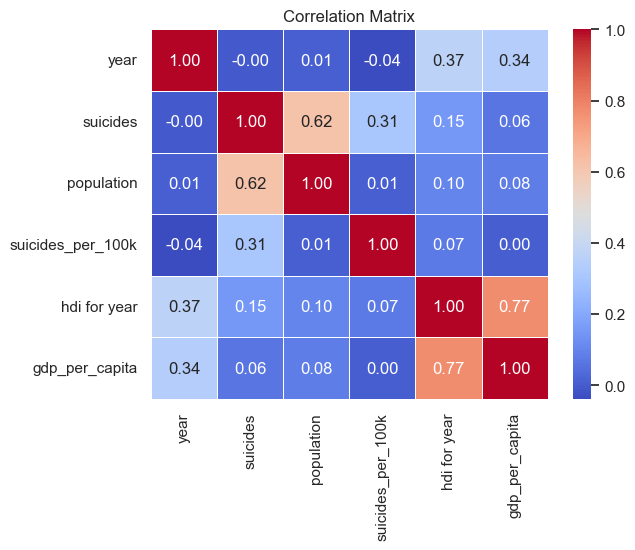

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### <a id='3.2'>3.2 Trend Overtime </a>
Visualizing suicide rates over the years:

/var/folders/th/jmr235c937d491kvdp6j1k180000gq/T/ipykernel_15012/962928711.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="year", y="suicides_per_100k", data=df, palette=magma_palette)


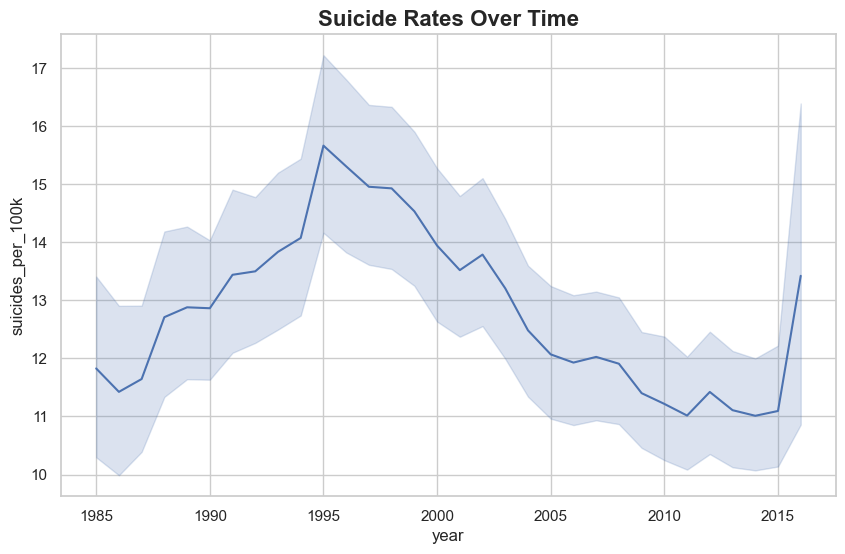

In [8]:
import seaborn as sns

sns.set(style="whitegrid")
magma_palette = sns.color_palette("magma", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="suicides_per_100k", data=df, palette=magma_palette)
plt.title("Suicide Rates Over Time", fontsize=16, fontweight='bold')
plt.show()

A noticeable peak in suicide rates around 1995 is observed.

### <a id='3.3'>3.3 Geographical Analysis </a>
Analyzing the evolution of suicide rates by country over time:

In [13]:
import plotly.express as px

df = df.sort_values("year")

# Create a scatter_geo map with time animation
fig = px.scatter_geo(
    df,
    locations="country",
    locationmode="country names",
    color="suicides_per_100k",
    hover_name="country",
    animation_frame="year",  
    color_continuous_scale="Magma",
    title="Evolution of Suicide Rates by Country (Yearly Animation)",
    projection="natural earth",
)

# Customizing the appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Suicide Rate per 100k Population"),
    coloraxis_showscale=False,  
)

# size of the map
fig.update_layout(height=600, width=1200)

# show the map
fig.show()


## <a id='4'> 4. Demographic Analysis</a>

### <a id='4.1'>4.1 Total Suicides By Country </a>
Identifying countries with the highest total suicides:

In [14]:
suicides_by_country = []
for country in df['country'].unique():
    suicides_by_country.append(sum(df[df['country'] == country]['suicides']))

total_suicides_by_country = pd.DataFrame(suicides_by_country, columns=['total_suicides_by_country'])
total_suicides_by_country['country'] = df['country'].unique()

quantity = 15
top_countries = total_suicides_by_country.sort_values('total_suicides_by_country', ascending=False)['country'][:quantity]
top_suicides = total_suicides_by_country.sort_values('total_suicides_by_country', ascending=False)['total_suicides_by_country'][:quantity]

# reverse the order to have the highest total suicides at the top
top_countries = top_countries[::-1]
top_suicides = top_suicides[::-1]

fig = px.bar(
    x=top_suicides,
    y=top_countries,
    orientation='h',
    color=top_suicides,  
    color_continuous_scale='magma',
    labels={'x': 'Total Suicides', 'y': 'Country'},
    title='Top Countries with the Highest Total Suicides',
)

# customize the appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Total Suicides'),
    coloraxis_showscale=False,  # Hide the color scale
)

# Show the plot
fig.show()


### <a id='4.2'>4.2 Population vs. Suicides </a>
Obviously, countries with larger populations should have more suicides, to remove such bias we will do this:

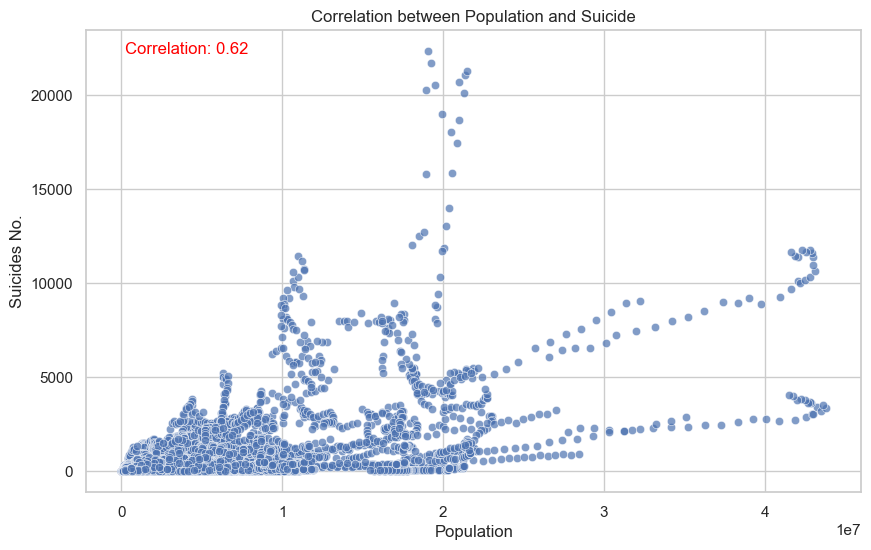

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# scatter plot
scatter_plot =sns.scatterplot(x='population', y='suicides', data=df, alpha=0.7)
correlation_coefficient = df['population'].corr(df['suicides'])

# set labels and title
plt.title('Correlation between Population and Suicide')
plt.xlabel('Population')
plt.ylabel('Suicides No.')
scatter_plot.annotate(f'Correlation: {correlation_coefficient:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', color='red') #to show the correlation on plot

# show the plot
plt.show()

It indicates a moderate positive correlation. As the population increases, the number of suicides tends to increase, but the relationship is not perfect. There might be other factors influencing the relationship.

### <a id='4.3'>4.3 Suicides per 100k Population </a>
To mitigate population bias, analyzing suicides per 100k inhabitants:

In [18]:
suicides_by_country_per_100k = []
for country in df['country'].unique():
    suicides_by_country_per_100k.append(sum(df[df['country'] == country]['suicides_per_100k']))

total_suicides_by_country_per_100k = pd.DataFrame(suicides_by_country_per_100k, columns=['suicides_per_100k'])
total_suicides_by_country_per_100k['country'] = df['country'].unique()

quantity = 15
top_countries_per_100k = total_suicides_by_country_per_100k.sort_values('suicides_per_100k', ascending=False)['country'][:quantity]
top_suicides_per_100k = total_suicides_by_country_per_100k.sort_values('suicides_per_100k', ascending=False)['suicides_per_100k'][:quantity]

# reverse the order to have the highest total suicides per 100k at the top
top_countries_per_100k = top_countries_per_100k[::-1]
top_suicides_per_100k = top_suicides_per_100k[::-1]

fig = px.bar(
    x=top_suicides_per_100k,
    y=top_countries_per_100k,
    orientation='h',
    color=top_suicides_per_100k, 
    color_continuous_scale='magma',
    labels={'x': 'Suicides per 100k', 'y': 'Country'},
    title='Top Countries with the Highest Suicides per 100k Population',
)

# customize the appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Suicides per 100k'),
    coloraxis_showscale=True,  # Hide the color scale
)

fig.show()


## <a id='5'> 5. Age Group Analysis </a>

### <a id='5.1'>5.1 Suicides by Generations </a>

In [22]:
suicides_by_generation = []
for generation in df['generation'].unique():
    suicides_by_generation.append(sum(df[df['generation'] == generation]['suicides']))

fig = px.bar(
    x=df['generation'].unique(),
    y=suicides_by_generation,
    color=suicides_by_generation,  
    color_continuous_scale='magma',
    labels={'x': 'Generation', 'y': 'Total Suicides'},
    title='Total Suicides by Generation',
)

# customize the appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Total Suicides'),
    coloraxis_showscale=False  # Hide the color scale
)

# show the plot
fig.show()


### <a id='5.2'>5.2 Suicides by Age Group </a>

In [24]:
suicides_by_age = []
age_order = ['75+ years', '55-74 years', '35-54 years', '25-34 years', '15-24 years', '5-14 years']

for age_group in age_order:
    suicides_by_age.append(sum(df[df['age'] == age_group]['suicides']))

fig = px.bar(
    x=age_order,
    y=suicides_by_age,
    color=suicides_by_age,  
    color_continuous_scale='magma',
    labels={'x': 'Age Group', 'y': 'Total Suicides'},
    title='Total Suicides by Age Group',
)

# customize the appearance
fig.update_layout(
    coloraxis_colorbar=dict(title='Total Suicides'),
    coloraxis_showscale=False,  
)


fig.show()


### <a id='5.3'>5.3 Suicides by Gender and Age Group </a>

In [25]:
suicides_by_gender = df.groupby(['gender', 'age'], as_index=False)['suicides'].sum()

# age groups
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

fig = px.bar(
    suicides_by_gender,
    x='age',
    y='suicides',
    color='gender',
    labels={'suicides_no': 'Total Suicides'},
    title='Total Suicides by Gender and Age Group',
    color_discrete_map={'male': 'blue', 'female': 'pink'},  # Custom colors
    category_orders={'age': age_order},  # Specify the order of age groups
)

# customize the appearance
fig.update_layout(barmode='group')  # Grouped bar chart

fig.show()


Males suicide rates are usually higher, no matter the age group
## <a id='6'>6. Gender Ratio Analysis </a>
### <a id='6.1'>6.1 Male-Female Suicide Rates Ratios </a>

In [26]:
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

file_path = 'male_to_female_ratio.csv'
df1 = pd.read_csv(file_path)

In [27]:
selected = ['Lithuania', 'Sri Lanka', 'Belarus', 'North Korea', 'Japan', 'South Korea', 'Poland', 'Belguim']
selectedMasks = []
for country in selected:
    mask = df1['country'].str.contains(country)
    selectedMasks.append(mask)

In [28]:
data = []
for i in range(len(selected)):
    
    trace = go.Scatter(
        x = ['2000', '2005', '2010', '2015'],
        y = df1[selectedMasks[i]]['rate'].values.tolist(),
        name = selected[i],
        line=dict(
            shape='spline'
        )
    )
    data.append(trace)

layout = go.Layout(
    title='Male-Female Suicide Rates Ratio in the Selected Countries',
    xaxis=dict(
        title='Year',
        ticks='outside',
        tick0=0,
        dtick=5
    ),
    yaxis=dict(
        title='Male-Female Ratio',
        rangemode='tozero'
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='line-mode')


## <a id='7'>7. Conclusion </a>

In summary, this comprehensive exploration of global suicide data sheds light on various aspects, including geographical patterns, demographic influences, and gender-specific trends. Further analysis and insights can be derived by delving into specific regions, time periods, and socioeconomic factors. The findings may contribute to informed strategies and interventions aimed at preventing suicide and promoting mental health globally.

Some interesting insights we were able to gather from this notebook: 
* Across all age groups, male suicide rates consistently tend to be higher.

* Boomers exhibited the highest rates of suicide across various age groups.

* Male-to-Female ratios suggest the relative difference between male and female suicide rates in each country, with a higher value indicating a higher ratio of male to female suicides.
* A male-female suicide ratio of 4.350 for Poland indicates that, in the context of suicides, there were approximately 4.350 times more suicides among males than females in Poland during the specified time period or year. The ratio is calculated by dividing the number of male suicides by the number of female suicides.

* In other words, for every female suicide in Poland during that time, there were around 4.350 male suicides. A higher ratio typically suggests a higher prevalence of suicides among males relative to females in that particular country or region.

* A male-female suicide rate ratio equaling 1 means the males suicide rate and the females suicide rate are roughly equal.

**Top 10 countries with the highest suicide rates for both sexes:**

1. Russian federation
2. Lithuania
3. Hungary
4. Kazakhstan
5. Republic of Korea
6. Austria
7. Ukraine
8. Japan
9. Finland
10. Belgium